In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re

In [3]:
fields = ['episode', 'reward', 'ep_block_prob', 'ep_accepted_requests', 'avg_deployment_cost',
        'avg_total_latency', 'avg_access_latency', 'avg_proc_latency',
        'avg_throuput_in', 'avg_packetsize_in', 'avg_interarrival_in', 
        'avg_throuput_out','avg_packetsize_out','avg_interarrival_out',
        'avg_qoe','gini', 'execution_time']

## Copare mean during training and testing

In [6]:
import os
import re
import pandas as pd

# Directory paths for training and testing logs
train_dir = './run_metrics'
test_dir = './run_metrics_test'

# Metric columns to calculate means
metric_columns = ['avg_qoe', 'gini', 'avg_total_latency', 'avg_deployment_cost', 'ep_accepted_requests']

# Listing training and testing files
train_files = set(sorted([f for f in os.listdir(train_dir) if f.endswith('.csv')]))
test_files = set(sorted([f for f in os.listdir(test_dir) if f.endswith('.csv')]))
names = list(train_files.intersection(test_files))

# Pattern to extract variables from the filename
pattern = r"(?P<alg>.+)_env_(?P<env_name>.+)_qoe_(?P<qoe_included>.+)_obj_(?P<obj_included>.+)_cw_(?P<cost_weight>.+)_qw_(?P<qoe_weight>.+)_lw_(?P<latency_weight>.+)_gw_(?P<gini_weight>.+)_sim_(?P<qoe_simulation_mode>.+)_acc_(?P<qoe_accuracy>.+)"

# List to hold all results
results = []

for file_name in names:
    # Match the pattern against the file name
    name = file_name.replace('.csv.csv', '')
    match = re.match(pattern, name)
    
    if match:
        # Extract variables
        variables = match.groupdict()
        train_file = os.path.join(train_dir, file_name)
        test_file = os.path.join(test_dir, file_name)
        
        # Load training and testing data
        df_train = pd.read_csv(train_file, on_bad_lines='skip')
        df_test = pd.read_csv(test_file, on_bad_lines='skip')
    
        # Calculate means for metrics
        train_means = df_train[metric_columns]
        test_means = df_test[metric_columns]

        # Convert means to dictionaries and add prefixes to keys
        train_dic = {f"train_{k}": np.asanyarray(list(v.values()))[:100] for k, v in train_means.to_dict().items()}
        test_dic = {f"test_{k}": np.asanyarray(list(v.values()))[:100] for k, v in test_means.to_dict().items()}
        
        # Combine variables, train, and test dictionaries
        #combined_result = {**variables, **train_dic, **test_dic}
        combined_result = {**variables, **train_dic, **test_dic}
        

        # Add the combined result to the results list
        results.append(combined_result)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)


results_df = results_df.astype({'cost_weight': 'float64', 'qoe_weight': 'float64', 'latency_weight': 'float64', 'gini_weight': 'float64'})

results_df.to_pickle('results_balanced_latency_in_observation_SMOTE.pkl')

# Analysing The Results

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Focus on columns of interest for analysis
columns_of_interest = [
    'cost_weight', 'qoe_weight', 'qoe_included',
    'train_avg_qoe', 'test_avg_qoe',
    'train_avg_deployment_cost', 'test_avg_deployment_cost',
]

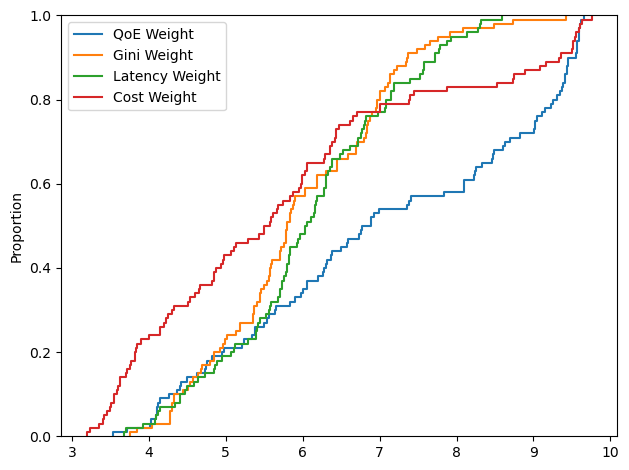

In [18]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Simulation')&(results_df['qoe_accuracy'] == '1.0')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'True')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


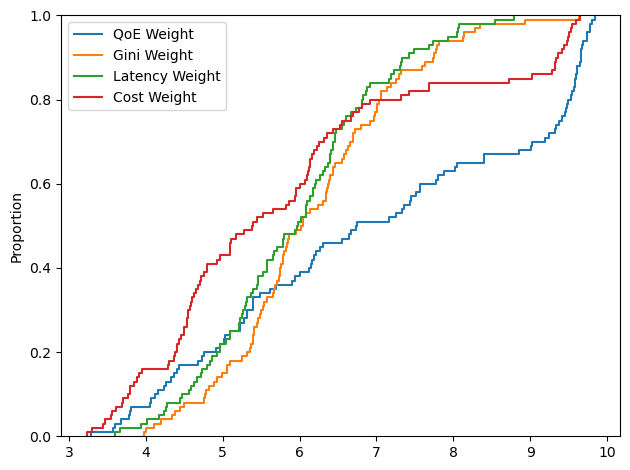

In [20]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Simulation')&(results_df['qoe_accuracy'] == '0.7')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'True')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


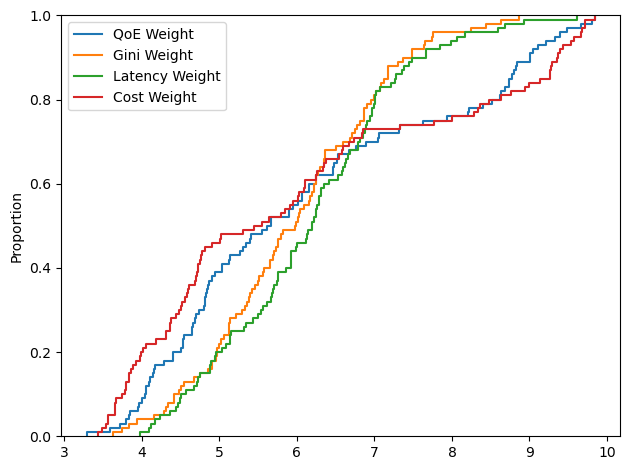

In [22]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Simulation')&(results_df['qoe_accuracy'] == '0.7')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'False')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


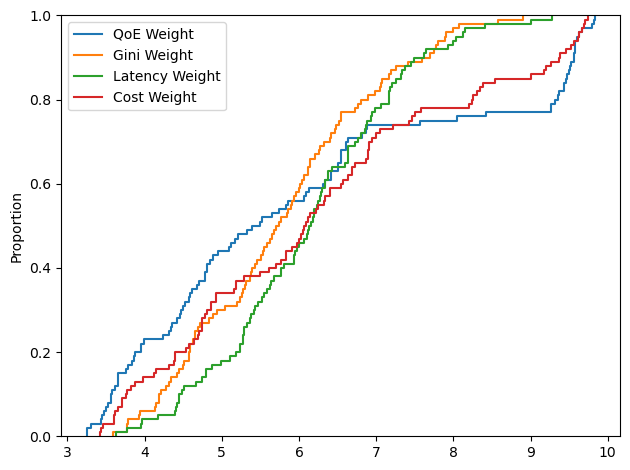

In [26]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Real')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'False')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


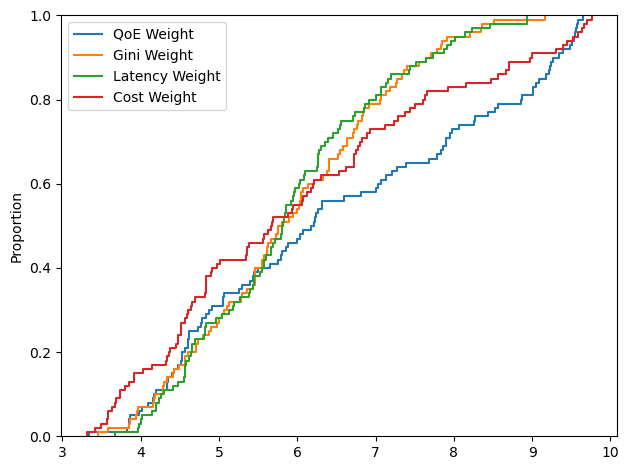

In [28]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Real')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'True')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


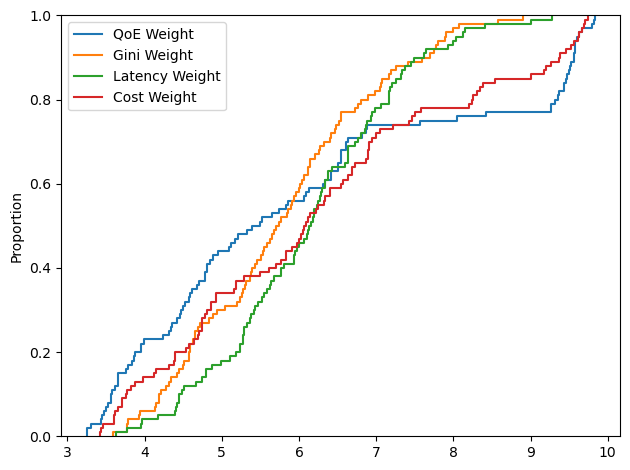

In [30]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Real')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'False')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## False True

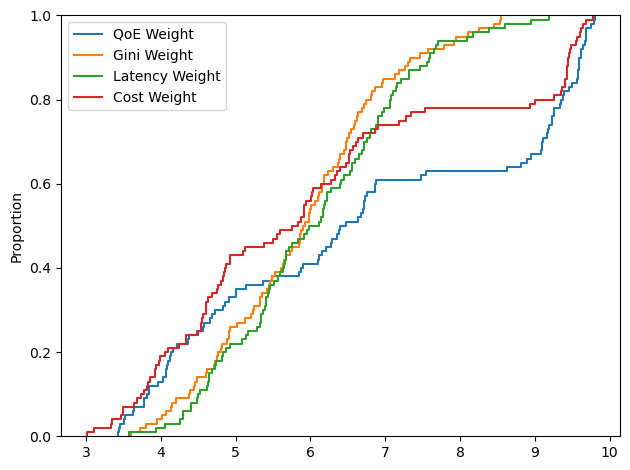

In [35]:
df = results_df[(results_df['qoe_included'] == 'False')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


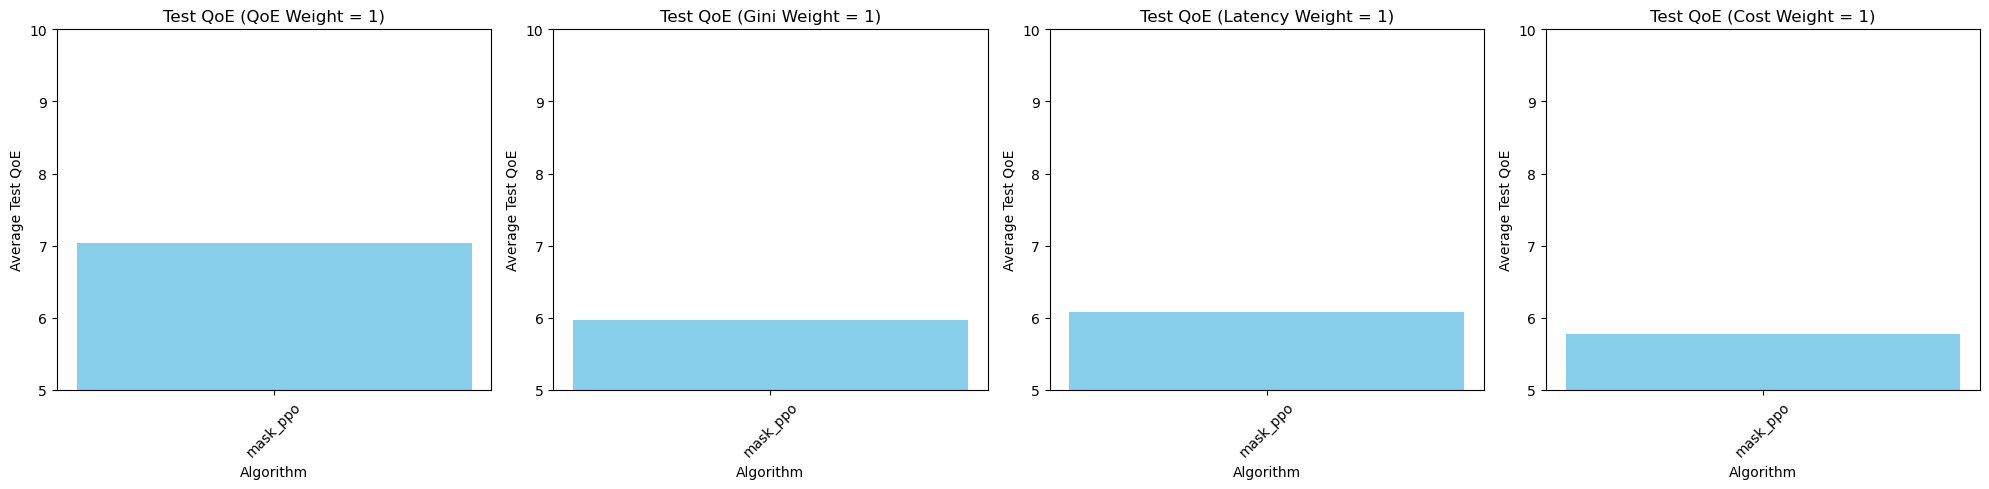

In [86]:
df = results_df[(results_df['qoe_accuracy'] == '1.0')&((results_df['obj_included'] == 'True'))]

import matplotlib.pyplot as plt

# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    axes[i].bar(filtered_df["alg"], np.mean(filtered_df["test_avg_qoe"].values[0]), color="skyblue")
    axes[i].set_title(f"Test QoE ({label} = 1)")
    axes[i].set_xlabel("Algorithm")
    axes[i].set_ylabel("Average Test QoE")
    axes[i].set_ylim([5,10])
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
